<a href="https://colab.research.google.com/github/riyamandloi15/Machine_Learning_Algo/blob/main/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df['target'] = iris.target




In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
149,5.9,3.0,5.1,1.8,2
71,6.1,2.8,4.0,1.3,1
142,5.8,2.7,5.1,1.9,2
40,5.0,3.5,1.3,0.3,0
70,5.9,3.2,4.8,1.8,1


In [ ]:
# Separate data by species
setosa_data = df[df['target'] == 0]
versicolor_data = df[df['target'] == 1]
virginica_data = df[df['target'] == 2]


In [ ]:
# Randomly select samples for training
train_setosa = setosa_data.sample(n=10, random_state=42)
train_virginica = virginica_data.sample(n=10, random_state=42)
train_df = pd.concat([train_setosa, train_virginica])
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']


In [ ]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
13,4.3,3.0,1.1,0.1
39,5.1,3.4,1.5,0.2
30,4.8,3.1,1.6,0.2
45,4.8,3.0,1.4,0.3
17,5.1,3.5,1.4,0.3


In [ ]:
# Randomly select samples for testing
test_setosa = setosa_data.drop(train_setosa.index).sample(n=5, random_state=42)
test_virginica = virginica_data.drop(train_virginica.index).sample(n=2, random_state=42)
test_versicolor = versicolor_data.sample(n=3, random_state=42)


In [ ]:
# Combine test samples
test_df = pd.concat([test_setosa, test_virginica, test_versicolor])
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']


In [ ]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
18,5.7,3.8,1.7,0.3
16,5.4,3.9,1.3,0.4
33,5.5,4.2,1.4,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Choose the value of K
k = 3


In [ ]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)


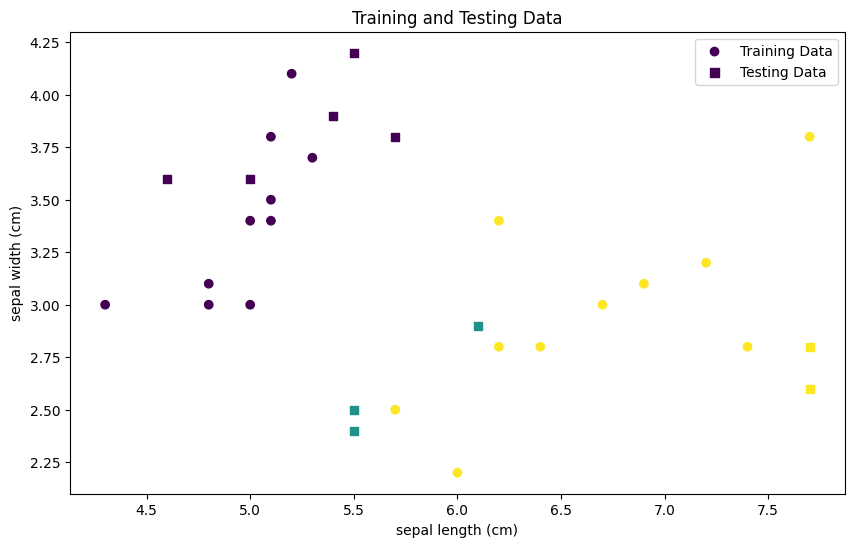

In [ ]:
# --- Plotting the training and testing data ---
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, marker='o', label='Training Data')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='s', label='Testing Data')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Training and Testing Data')
plt.legend()
plt.show()  # This will display the plot in Jupyter Lab


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.70
Precision: 0.58
Recall: 0.70
F1-score: 0.61


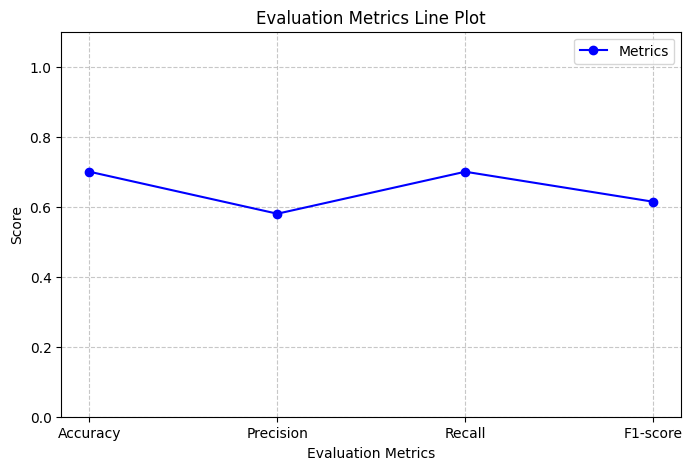

In [ ]:
import matplotlib.pyplot as plt

# Metric names and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create the line plot
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', label='Metrics')

# Add labels, title, and legend
plt.ylim(0, 1.1)  # Metrics range from 0 to 1, with some buffer
plt.ylabel('Score')
plt.xlabel('Evaluation Metrics')
plt.title('Evaluation Metrics Line Plot')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
